# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# !pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins
import pandas as pd

In [ ]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins = pd.get_dummies(penguins)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## Testing models with different number of parameters

In [ ]:
# Step 1. Import packages and clean the data - dropna
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression # use LR for now
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# cleaning the data
penguins = penguins.dropna()

## MODELS

## Model 1: *bill_length_mm, body_mass_g*

---

In [ ]:
# defining variables of the model
X = penguins[["bill_length_mm", "body_mass_g"]]
y = penguins["bill_depth_mm"]

In [ ]:
# shortcut name for the model
lr = LinearRegression()

In [ ]:
# splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# training the model
m1 = lr.fit(X_train, y_train)

In [ ]:
m1.score(X_train, y_train)

0.24337455071002922

In [ ]:
# predicting Y based on training dataset X_train
Y_train_pred_m1 = m1.predict(X_train)

In [ ]:
# R-squared and MSE for Y_train_pred
r2_m1_train = r2_score(y_train, Y_train_pred_m1)
mse_m1_train = mean_squared_error(y_train, Y_train_pred_m1)

In [ ]:
# testing the model
Y_test_pred_m1 = m1.predict(X_test)

In [ ]:
# R-squared and MSE for Model 1:
r2_m1_test = r2_score(y_test, Y_test_pred_m1)
mse_m1_test = mean_squared_error(y_test, Y_test_pred_m1)

In [ ]:
print(f"R-squared M1 train: {r2_m1_train}")
print(f"MSE LR train: {mse_m1_train}")

R-squared M1 train: 0.24337455071002922
MSE LR train: 2.8630584160330788


In [ ]:
print(f"R-squared M1 test: {r2_m1_test}")
print(f"MSE LR test: {mse_m1_test}")

R-squared M1 test: 0.1787199341114165
MSE LR test: 3.4487155660246365


## Model 2: *bill_length_mm, species*

---

In [ ]:
# defining variables of the model
X2 = penguins[["bill_length_mm", "species_Adelie", "species_Chinstrap", "species_Gentoo"]]
y = penguins["bill_depth_mm"]

In [ ]:
# splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25)

In [ ]:
# training the model
m2 = lr.fit(X_train, y_train)

In [ ]:
m2.score(X_train, y_train)

0.7869869996891681

In [ ]:
# predicting Y based on training dataset X_train
Y_train_pred_m2 = m2.predict(X_train)

In [ ]:
# R-squared and MSE for Y_train_pred
r2_m2_train = r2_score(y_train, Y_train_pred_m2)
mse_m2_train = mean_squared_error(y_train, Y_train_pred_m2)

In [ ]:
# testing the model
Y_test_pred_m2 = m2.predict(X_test)

In [ ]:
# R-squared and MSE for Model 2:
r2_m2_test = r2_score(y_test, Y_test_pred_m2)
mse_m2_test = mean_squared_error(y_test, Y_test_pred_m2)

In [ ]:
print(f"R-squared M2 train: {r2_m2_train}")
print(f"MSE M2 train: {mse_m2_train}")

R-squared M2 train: 0.7869869996891681
MSE M2 train: 0.8122885885881059


In [ ]:
print(f"R-squared M2 test: {r2_m2_test}")
print(f"MSE M2 test: {mse_m2_test}")

R-squared M2 test: 0.7165635230871122
MSE M2 test: 1.1649346505356488


## Model 3: interaction bill_length * flipper length

---



In [ ]:
penguins['bl_fl'] = penguins['bill_length_mm'] * penguins['flipper_length_mm']

In [ ]:
# defining variables of the model
X3 = penguins[["bill_length_mm", "flipper_length_mm", "bl_fl"]]
y = penguins["bill_depth_mm"]

In [ ]:
# splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25)

In [ ]:
# training the model
m3 = lr.fit(X_train, y_train)

In [ ]:
m3.score(X_train, y_train)

0.38463382829887793

In [ ]:
# predicting Y based on training dataset X_train
Y_train_pred_m3 = m3.predict(X_train)

In [ ]:
# R-squared and MSE for Y_train_pred
r2_m3_train = r2_score(y_train, Y_train_pred_m3)
mse_m3_train = mean_squared_error(y_train, Y_train_pred_m3)

In [ ]:
# testing the model
Y_test_pred_m3 = m3.predict(X_test)

In [ ]:
# R-squared and MSE for Model 2:
r2_m3_test = r2_score(y_test, Y_test_pred_m3)
mse_m3_test = mean_squared_error(y_test, Y_test_pred_m3)

In [ ]:
print(f"R-squared M3 train: {r2_m3_train}")
print(f"MSE M3 train: {mse_m3_train}")

R-squared M3 train: 0.38463382829887793
MSE M3 train: 2.407079203708867


In [ ]:
print(f"R-squared M3 test: {r2_m3_test}")
print(f"MSE M3 test: {mse_m3_test}")

R-squared M3 test: 0.28705161681143665
MSE M3 test: 2.4621897981185645


## Model 4: more predictors and interaction on dychotomous variable  'body_mass_g', 'flipper_length', 'sex_female', 'sex_female'*'body_mass_g'
---



In [ ]:
penguins['sf_bm'] = penguins['sex_female'] * penguins['body_mass_g']

In [ ]:
# penguins.head()

In [ ]:
# defining variables of the model
X4 = penguins[["body_mass_g", "flipper_length_mm", "sex_female", "sf_bm"]]
y = penguins["bill_depth_mm"]

In [ ]:
# splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.25)

In [ ]:
# training the model
m4 = lr.fit(X_train, y_train)

In [ ]:
m4.score(X_train, y_train)

0.62872288269883

In [ ]:
# predicting Y based on training dataset X_train
Y_train_pred_m4 = m4.predict(X_train)

In [ ]:
# R-squared and MSE for Y_train_pred
r2_m4_train = r2_score(y_train, Y_train_pred_m4)
mse_m4_train = mean_squared_error(y_train, Y_train_pred_m4)

In [ ]:
# testing the model
Y_test_pred_m4 = m4.predict(X_test)

In [ ]:
# R-squared and MSE for Model 2:
r2_m4_test = r2_score(y_test, Y_test_pred_m4)
mse_m4_test = mean_squared_error(y_test, Y_test_pred_m4)

In [ ]:
print(f"R-squared M4 train: {r2_m4_train}")
print(f"MSE M4 train: {mse_m4_train}")

R-squared M4 train: 0.62872288269883
MSE M4 train: 1.36233769331737


In [ ]:
print(f"R-squared M4 test: {r2_m4_test}")
print(f"MSE M4 test: {mse_m4_test}")

R-squared M4 test: 0.5911497292474592
MSE M4 test: 1.749764176592215


Summarizing four models results into dataframes

In [ ]:
r_squared_results = pd.DataFrame({
    "Model": ["Model 1", "Model 1", "Model 2", "Model 2", "Model 3", "Model 3", "Model 4", "Model 4"],
    "Dataset": ["Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test"],
    "R-squared": [r2_m1_train, r2_m1_test, r2_m2_train, r2_m2_test, r2_m3_train, r2_m3_test, r2_m4_train, r2_m4_test]
})
print(r_squared_results)

     Model Dataset  R-squared
0  Model 1   Train   0.243375
1  Model 1    Test   0.178720
2  Model 2   Train   0.786987
3  Model 2    Test   0.716564
4  Model 3   Train   0.384634
5  Model 3    Test   0.287052
6  Model 4   Train   0.628723
7  Model 4    Test   0.591150


In [ ]:
mse_results = pd.DataFrame({
    "Model": ["Model 1", "Model 1", "Model 2", "Model 2", "Model 3", "Model 3", "Model 4", "Model 4"],
    "Dataset": ["Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test"],
    "MSE": [mse_m1_train, mse_m1_test, mse_m2_train, mse_m2_test, mse_m3_train, mse_m3_test, mse_m4_train, mse_m4_test]
})
print(mse_results)

     Model Dataset       MSE
0  Model 1   Train  2.863058
1  Model 1    Test  3.448716
2  Model 2   Train  0.812289
3  Model 2    Test  1.164935
4  Model 3   Train  2.407079
5  Model 3    Test  2.462190
6  Model 4   Train  1.362338
7  Model 4    Test  1.749764


## Plotting of models results

---

In [ ]:
# Visualziation of the results # assisted with ChatGPT
from plotnine import *

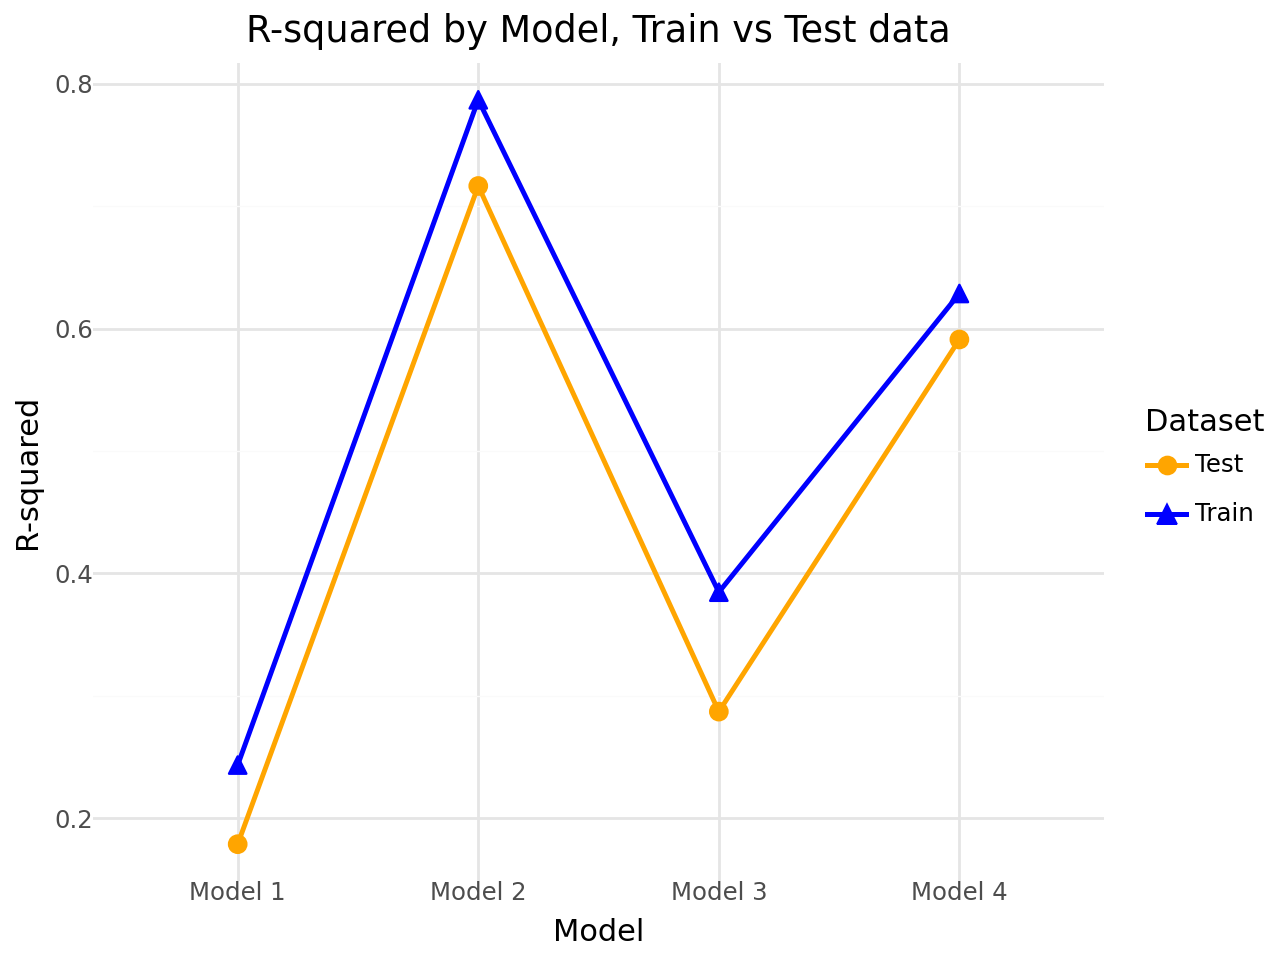

In [ ]:
# Plot of Train & Test R-squared for each Model
(ggplot(r_squared_results, aes(x='Model', y='R-squared', color='Dataset', shape='Dataset'))
    + geom_point(aes(group='Model'),size=3)
    + geom_line(aes(group='Dataset'), size=1)
    + labs(title='R-squared by Model, Train vs Test data', x='Model', y='R-squared')
    + theme_minimal()
    + scale_color_manual(values={'Train': 'blue', 'Test': 'orange'})
)

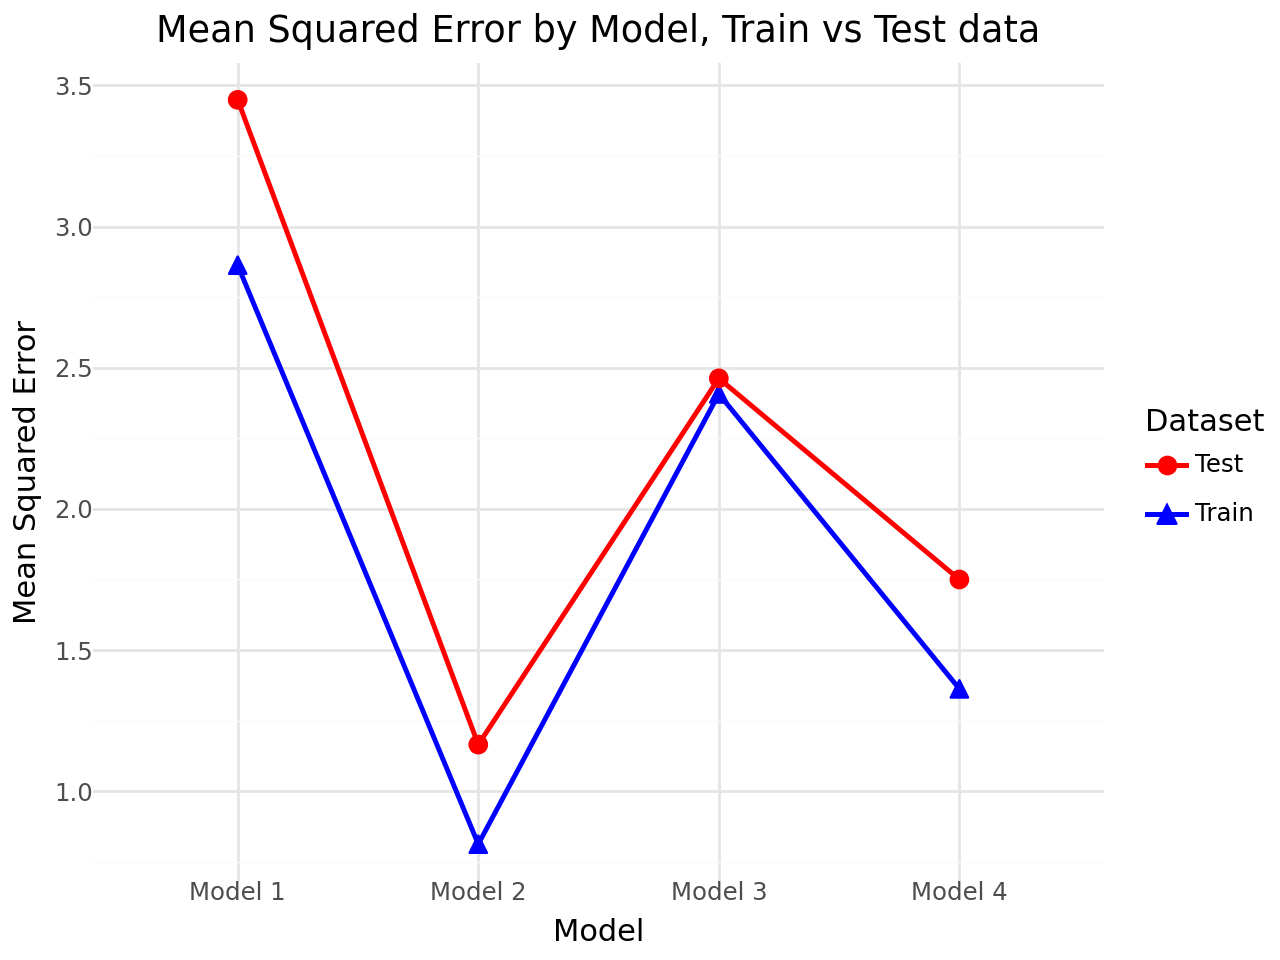

In [ ]:
# MSE Plot
(ggplot(mse_results, aes(x='Model', y='MSE', color='Dataset', shape='Dataset'))
    + geom_point(aes(group='Dataset'),size=3)
    + geom_line(aes(group='Dataset'), size=1)
    + labs(title='Mean Squared Error by Model, Train vs Test data', x='Model', y='Mean Squared Error')
    + theme_minimal()
    + scale_color_manual(values={'Train': 'blue', 'Test': 'red'})
)


Answer:
---

Based on the R-squared and MSE results of the four tested models (also visible on the plots) - Model 2 (*bill_length_mm, species*), appears to be the most efficient and robust in predicting the bill_depth of a penguin from the dataset. This model scores the highest R-squared on both train and (even higher) on test data, while has the lowest MSE on both data samples. Model 4 is a runner-up with slightly worse results on both metrics and data samples. While Model 1 and 3 performed the lowest on according to these metrics.